In [38]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)


import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [24]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

In [25]:
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [26]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [27]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

In [28]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [29]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partical_y_train = y_train[1000:]

In [34]:
history = model.fit(x_train,
                    y_train,
                    epochs=9,
                    batch_size=512)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9188 - loss: 0.3885
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9296 - loss: 0.3327
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9366 - loss: 0.2839
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9482 - loss: 0.2325
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9544 - loss: 0.2016
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9560 - loss: 0.1845
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9547 - loss: 0.1693
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9567 - loss: 0.1625
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9609 - loss: 0.1477


In [35]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)


KeyError: 'val_loss'

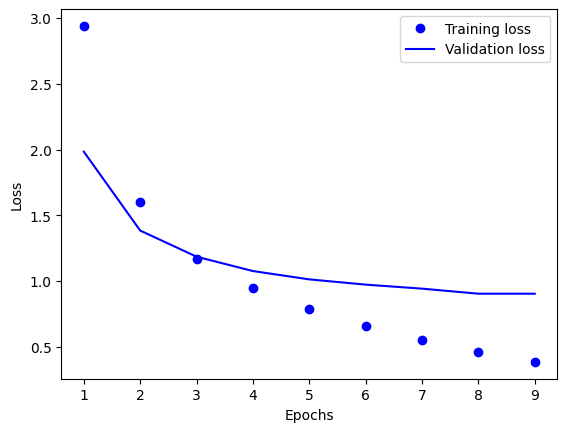

In [ ]:
plt.plot(epochs, loss_values, 'bo', label='Training loss') # bo blue dots
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # b solid blue line
plt.title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
results = model.evaluate(x_test, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8055 - loss: 0.9896


In [37]:
predictions = model.predict(x_test)
label_class = np.argmax(predictions[0])
label_class

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step


3